<a href="https://colab.research.google.com/github/en-genius/Datascience/blob/main/CEREBRO_VASCULAR_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<center>CEREBROVASCULAR DISEASE DATASCIENCE PROJECT</center>

###OBJECTIVE
The objective of this data science project is to develop a machine learning model that can predict the likelihood of occurrence of stroke given certain paramenters as specified in the dataset obtained from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

###BACKGROUND
According to the World Health Organization approximately 15 million people suffer from stroke world wide. 5 million people die annually while 5 million are rendered disabled The prevalence of stroke in individuals less than 40 years is uncommon.The main cause of stroke is hypertension.

##TABLE OF CONTENT


1.   Importing the prerequisite modules
2.   Loading the dataset into a dataframe
3.   Exploratory data analysis  
4.   Data visualization
5.   Data preprocessing 
6.   Modelling
7.   Evaluation
8.   Conclusion


##Import the prerequisite python modules

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##Load the dataset into the dataframe


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Stroke/healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Exploratory Data Analysis

In [3]:
## Converting the attributes of the dataset into a list
df_array = []
for i in df.columns:
  df_array.append(i)

print(df_array)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [4]:
##Getting the shape of the data
print('The length of the features of the dataset:', df.shape[1])
print('The total number of entries recorded: ', df.shape[0])

The length of the features of the dataset: 12
The total number of entries recorded:  5110


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In [5]:
#Summarize the data using measures of central tendency and dispersion
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#NB: There are several columns with categorial inputs
# On inspection of the dataset, it appears that heart disease and hypertension were represented with integers instead of strings during data collection.
#Converting stroke, hypertension and heart disease columns into objects
def CastToString(v):
  return str(v)

df.stroke = df.stroke.apply(CastToString)
df.hypertension = df.stroke.apply(CastToString)
df.heart_disease = df.stroke.apply(CastToString)

In [8]:
corr_matrix = df.corr()
corr_matrix['age'].sort_values(ascending=False)

age                  1.000000
bmi                  0.333398
avg_glucose_level    0.238171
id                   0.003538
Name: age, dtype: float64

In [9]:
corr_matrix = df.corr()
corr_matrix['bmi'].sort_values(ascending=False)

bmi                  1.000000
age                  0.333398
avg_glucose_level    0.175502
id                   0.003084
Name: bmi, dtype: float64

In [10]:
corr_matrix = df.corr()
corr_matrix['avg_glucose_level'].sort_values(ascending=False)

avg_glucose_level    1.000000
age                  0.238171
bmi                  0.175502
id                   0.001092
Name: avg_glucose_level, dtype: float64

##Data Visualization


In [11]:
num_attributes = ['age','avg_glucose_level','bmi']

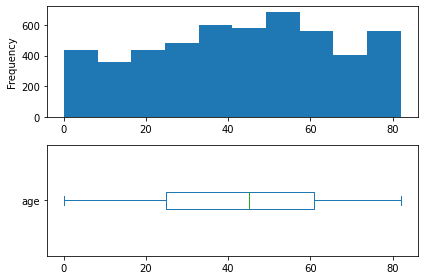

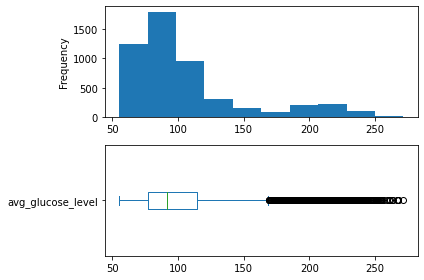

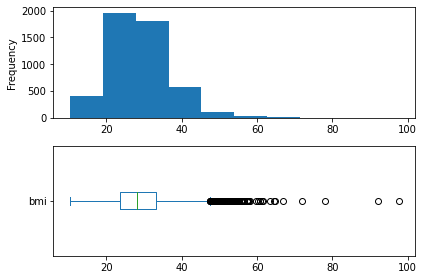

<Figure size 432x288 with 0 Axes>

In [12]:
#Summarizing the data using boxplot and histogram
attributes = num_attributes
for attr in attributes:
 plt.subplot(2,1,1)
 df[attr].plot.hist()
 plt.subplot(2,1,2)
 df[attr].plot.box(vert=False)
 plt.tight_layout()
 plt.show()
 plt.savefig('{}.png'.format(attr), dpi=400)


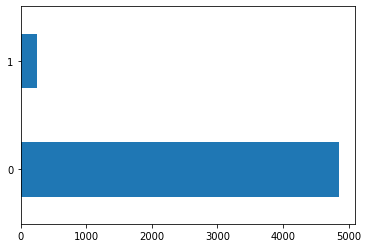

In [13]:
#NB: The dataset has class imbalance
df['stroke'].value_counts().plot.barh()

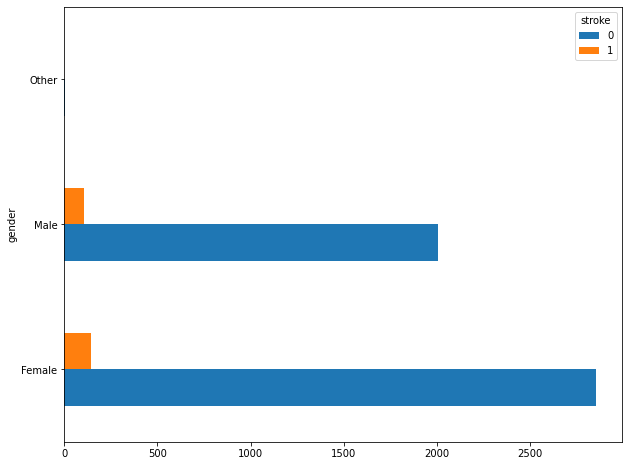

In [14]:
df.groupby(['gender','stroke']).size().unstack().plot.barh(figsize=(10,8))
plt.show()

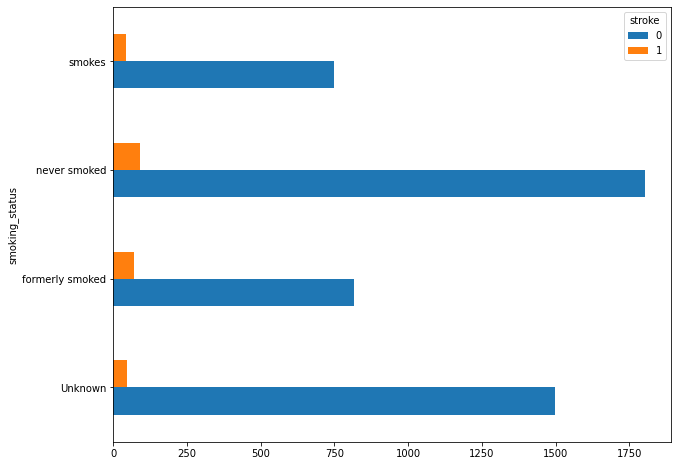

In [15]:
df.groupby(['smoking_status','stroke']).size().unstack().plot.barh(figsize=(10,8))
plt.show()

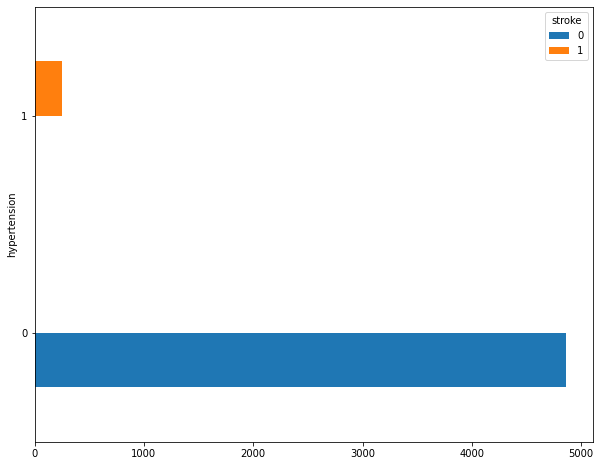

In [16]:
df.groupby(['hypertension','stroke']).size().unstack().plot.barh(figsize=(10,8))
plt.show()

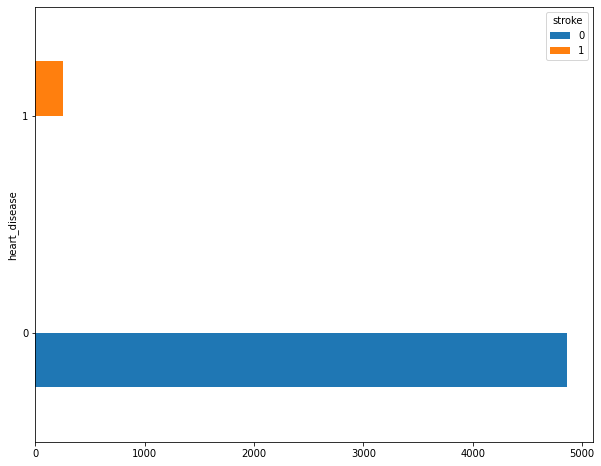

In [17]:
df.groupby(['heart_disease','stroke']).size().unstack().plot.barh(figsize=(10,8))
plt.show()

##Data Preprocessing

In [18]:
#Check for missing values in the dataset
##NB: BMI column has missing 201 values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
#Using a t-test to determine whether the BMI is missing at random(MAR), missing completely at random(MCAR) and missing not at random(MNAR)
BM = df.bmi.isna()
ttest_ind(df[BM].age, df[~BM].age)

#From the p-value alongside the boxplots and histograms made earlier, it can be observed that there is a significant relationship between missing values in 'bmi' column and 'age'

#DIAGNOSIS:
#Missing at random
#It could be infered that missing at random dilemma is due to the fact that the higher the age of the participants in the study, the less likely their body mass index would be measured.

#### PROBABLE CAUSE OF MISSING VALUES
#1.Refusal of the participants to have their weight or height taken.
#2.Measurement device malfunction.


Ttest_indResult(statistic=5.660693392795374, pvalue=1.5898954848494646e-08)

In [20]:
#Filling the missing values with the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [21]:
#Separating the label of the dataset prior to processing
label = df.stroke
df.drop(['stroke'], axis=1)

#Creating a pipeline to handle the transformation of both categorical and scaling numerical inputs at the same time
num_pipeline = Pipeline([('std_scaler', StandardScaler()),
 ])
X_num = df[['age','avg_glucose_level', 'bmi']]
num_attribs = list(X_num)
cat_attribs = ['gender','ever_married','work_type','hypertension','heart_disease','smoking_status','Residence_type']
full_pipeline = ColumnTransformer([
 ('num', num_pipeline, num_attribs),
 ('cat', OneHotEncoder(), cat_attribs),
 ])
df_prepared = full_pipeline.fit_transform(df)

##Modelling

###Splitting the data into a shuffled training and test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_prepared, label, test_size=0.2, random_state=2)

In [23]:
model = RandomForestClassifier()
##Obtain the best training parameters from a subset of hyperparameters before building a model
param_grid=[{'n_estimators':[50, 100, 150, 200], 'max_features':[2, 4, 6, 8]}]
grid_search = GridSearchCV(model, param_grid,cv=5, scoring='balanced_accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 150, 200]}],
             return_train_score=True, scoring='balanced_accuracy')

In [24]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(max_features=2, n_estimators=50)

##Evaluation

In [25]:
#Evaluating the model on the test set
final_predictions = final_model.predict(X_test)

In [26]:
confusion_matrix(y_test,final_predictions)

array([[971,   0],
       [  0,  51]])

In [27]:
print(classification_report(y_test, final_predictions, labels=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       971
           1       1.00      1.00      1.00        51

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



##Conclusion

The model had a perfect precision and recall however this could have due to the fact that the sample size is small and the model overfitted it.

##Author

Anthony Ukwenya